# Importing libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [10]:
df= pd.read_csv('personality_dataset.csv')
df.head(5)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [12]:
df.shape

(2900, 8)

In [13]:
df.memory_usage(deep=True)

Index                           132
Time_spent_Alone              23200
Stage_fear                   147923
Social_event_attendance       23200
Going_outside                 23200
Drained_after_socializing    148319
Friends_circle_size           23200
Post_frequency                23200
Personality                  168200
dtype: int64

In [14]:
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2837.000000,2838.000000,2834.000000,2823.000000,2835.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.479192,2.903827,2.247327,4.289693,2.926582
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,8.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


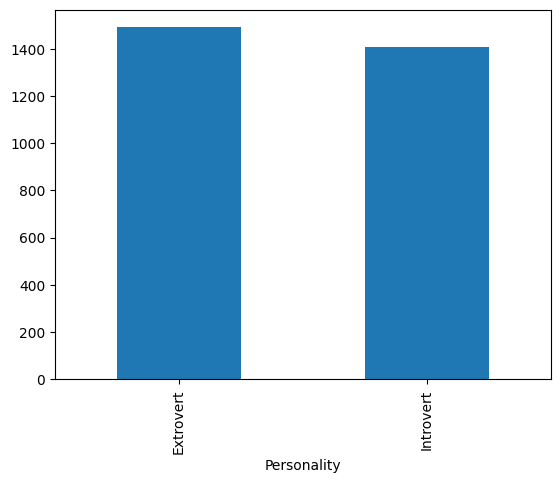

In [15]:
df['Personality'].value_counts().plot(kind='bar')
plt.show()

In [16]:
df['Personality'].replace(['Introvert','Extrovert'],[0,1],inplace=True)
df.head(5)

/tmp/ipykernel_4109/1762097072.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Personality'].replace(['Introvert','Extrovert'],[0,1],inplace=True)
/tmp/ipykernel_4109/1762097072.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Personality'].replace(['Introvert','Extrovert'],[0,1],inpl

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,1
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,0
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,0
3,0.0,No,6.0,7.0,No,14.0,8.0,1
4,3.0,No,9.0,4.0,No,8.0,5.0,1


In [17]:
# df['Stage_fear'].replace(['', 'No', 'Yes'],[0,0,1],inplace=True)
# df['Drained_after_socializing'].replace(['', 'No', 'Yes'],[0,0,1],inplace=True)
df.replace(['No', 'Yes'],[0,1],inplace=True)
df.fillna(0, inplace=True)
# replace all '' with 0, 'No' with 0 and 'Yes' with 1
df.replace('', 0, inplace=True)

df.head(10)

/tmp/ipykernel_4109/2932994003.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(['No', 'Yes'],[0,1],inplace=True)


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0.0,4.0,6.0,0.0,13.0,5.0,1
1,9.0,1.0,0.0,0.0,1.0,0.0,3.0,0
2,9.0,1.0,1.0,2.0,1.0,5.0,2.0,0
3,0.0,0.0,6.0,7.0,0.0,14.0,8.0,1
4,3.0,0.0,9.0,4.0,0.0,8.0,5.0,1
5,1.0,0.0,7.0,5.0,0.0,6.0,6.0,1
6,4.0,0.0,9.0,0.0,0.0,7.0,7.0,1
7,2.0,0.0,8.0,4.0,0.0,7.0,8.0,1
8,10.0,1.0,1.0,3.0,1.0,0.0,3.0,0
9,0.0,0.0,8.0,6.0,0.0,13.0,8.0,1


In [18]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [19]:
X=df.iloc[:,0:7].apply(pd.to_numeric, errors='coerce').fillna(0) # all entries
print(X.head(5))
Y=df.iloc[:,7].apply(pd.to_numeric, errors='coerce').fillna(0) # all rows, last column
print(Y.head(5))


   Time_spent_Alone  Stage_fear  Social_event_attendance  Going_outside  \
0               4.0         0.0                      4.0            6.0   
1               9.0         1.0                      0.0            0.0   
2               9.0         1.0                      1.0            2.0   
3               0.0         0.0                      6.0            7.0   
4               3.0         0.0                      9.0            4.0   

   Drained_after_socializing  Friends_circle_size  Post_frequency  
0                        0.0                 13.0             5.0  
1                        1.0                  0.0             3.0  
2                        1.0                  5.0             2.0  
3                        0.0                 14.0             8.0  
4                        0.0                  8.0             5.0  
0    1
1    0
2    0
3    1
4    1
Name: Personality, dtype: int64


In [23]:
best_features= SelectKBest(score_func=chi2, k=7)
fit= best_features.fit(X,Y)
print(fit.scores_)

[3969.44239107 1070.1195558  3243.78104242 2659.93659318 1067.01955059
 4013.71479941 3625.04893131]


In [21]:
df_scores= pd.DataFrame(fit.scores_)
df_columns= pd.DataFrame(X.columns)

In [24]:
features_scores= pd.concat([df_columns, df_scores], axis=1)
features_scores.columns= ['Features', 'Score']
features_scores.sort_values(by = 'Score')

,Features,Score
4,Drained_after_socializing,1067.019551
1,Stage_fear,1070.119556
3,Going_outside,2659.936593
2,Social_event_attendance,3243.781042
6,Post_frequency,3625.048931
0,Time_spent_Alone,3969.442391
5,Friends_circle_size,4013.714799


In [ ]:
X= df[['Drained_after_socializing', 
       'Stage_fear', 
       'Going_outside', 
       'Social_event_attendance', 
       'Post_frequency', 
       'Friends_circle_size',
       'Time_spent_Alone'
       ]] # the top 7 features
Y= df[['Personality']] # target

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.4,random_state=100)

In [35]:
logreg= LogisticRegression()
logreg.fit(X_train,y_train)

/mnt/gaming/homework_folder/personality-dataset-manager-frontend/personality-dataset-manager/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [39]:
y_pred=logreg.predict(X_test)
print (X_test) #test dataset
print (y_pred) #predicted values

      Drained_after_socializing  Stage_fear  Going_outside  \
2481                        1.0         1.0            0.0   
606                         1.0         1.0            1.0   
98                          0.0         0.0            7.0   
773                         0.0         0.0            7.0   
2600                        0.0         0.0            6.0   
...                         ...         ...            ...   
248                         1.0         1.0            2.0   
2731                        0.0         0.0            3.0   
625                         0.0         0.0            5.0   
1076                        0.0         0.0            6.0   
326                         0.0         0.0            6.0   

      Social_event_attendance  Post_frequency  Friends_circle_size  \
2481                      3.0             0.0                  1.0   
606                       3.0             0.0                  0.0   
98                       10.0            10.0

In [40]:
from sklearn import metrics
from sklearn.metrics import classification_report
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
print('Recall: ',metrics.recall_score(y_test, y_pred, zero_division=1))
print('Precision:',metrics.precision_score(y_test, y_pred, zero_division=1))
print('CL Report:',metrics.classification_report(y_test, y_pred, zero_division=1))

Accuracy:  0.9198275862068965
Recall:  0.9303482587064676
Precision: 0.9166666666666666
CL Report:               precision    recall  f1-score   support

           0       0.92      0.91      0.92       557
           1       0.92      0.93      0.92       603

    accuracy                           0.92      1160
   macro avg       0.92      0.92      0.92      1160
weighted avg       0.92      0.92      0.92      1160



In [41]:
y_pred_proba= logreg.predict_proba(X_test) [::,1]

## Input/Predict here

In [47]:
# Prompt user for all 7 feature values
input_features = {}
for col in X.columns:
    input_features[col] = float(input(f"Enter {col}: "))

# Create a DataFrame for prediction
sample_df = pd.DataFrame([input_features])
predicted_personality = logreg.predict(sample_df)[0]
print("Input Features:", input_features)
print(logreg.predict(sample_df))
print("Predicted Personality:", "Extrovert" if predicted_personality == 1 else "Introvert")

ValueError: could not convert string to float: ''

In [42]:
false_positive_rate, true_positive_rate, _ = metrics.roc_curve(y_test, y_pred_proba)

In [43]:
auc= metrics.roc_auc_score(y_test, y_pred_proba)

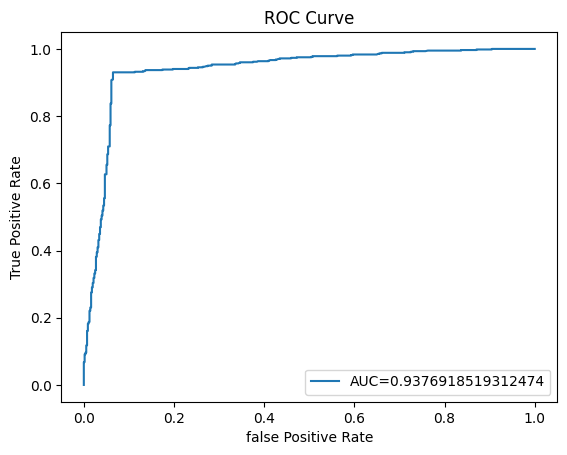

In [46]:
plt.plot(false_positive_rate, true_positive_rate,label="AUC="+str(auc))
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('false Positive Rate')
plt.legend(loc=4)